In [ ]:
#AUTHOR: Lisa Blum Moyse
#        lisa.blum-moyse@inria.fr
#
# REFERENCE: Blum Moyse & Berry. Modelling the modulation of cortical Up-Down state switching by astrocytes
#
# LICENSE: CC0 1.0 Universal

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math as math
from ipykernel import kernelapp as app
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib qt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import interpolate
import pandas as pd

In [3]:
# with astrocytes Jai>0 3x

taue = 20; taui = 10; tau_astro = 160
M = 10
Ne=400*M; Ni=100*M; Na = 200*M
th = 20 ; tha = 13; taub = 1; tauba = 1;
Cae = 0.5; Cai = 0.5
Jee = 280/Ne*taue; Jei=-70/Ni*taue; Jie=500/Ne*taui; Jii=-100/Ni*taui;

Jia = 0.4*11/Na*10*20*taui; Jaa = 2/Na*tau_astro; Jea = 1*11/Na*10*20*taue; 
Jai = 0.2/22*100/Ni/1.5*(1/Cai)/10*3*tau_astro; Jae = 0.2/8*400/Ne/1.5*(1/Cae)/10*tau_astro
   
siga = 3
Ka = 600; 
Vli=6.5; Vle=7.6; Vla = 7; Vr=14; Vra = 9; Nmax = 2
disp = 1
LE = []; LI = []; LA = []; E01=[]; E02=[]; E1=[]; I01=[]; I02=[]; I1=[]
beta = 1
Lsig = [1.5]
epsilon = 1e-5; epsilona = 1e-5
delta = 8e-5
leng = 0.007#0.01
ini = -0.01
du = 0.025

RE = np.arange(ini,leng,delta)

re = np.array([np.array([RE,]*math.ceil((leng-ini)/delta)).transpose(),]*math.ceil((leng-ini)/delta)).transpose()
ri = np.array([np.array([RE,]*math.ceil((leng-ini)/delta)),]*math.ceil((leng-ini)/delta))
ra = np.array([np.array([RE,]*math.ceil((leng-ini)/delta)),]*math.ceil((leng-ini)/delta)).transpose()


for sig in Lsig:
    sige = sig
    sigi = sig
    print('/Ce'+str(int(round(sig*1000)))+'.csv')
    Se=0; Si = 0; Sa = 0
    for u in np.arange(1e-10,Nmax,du):
            print(u)
            mue = Vle+Ne*Jee*re*taub+Ni*Jei*ri*taub+0.1*Na*Jea*ra*tauba - Ka*beta*re
            Se += du*np.exp(-u**2)/u*(np.exp((th-mue)*2*u/sige)-np.exp((Vr-mue)*2*u/sige))
            mui = Vli+Ne*Jie*re*taub+Ni*Jii*ri*taub+0.1*Na*Jia*ra*tauba 
            Si += du*np.exp(-u**2)/u*(np.exp((th-mui)*2*u/sigi)-np.exp((Vr-mui)*2*u/sigi))
            mua = Vla+Cae*Ne*Jae*re*taub+Cai*Ni*Jai*ri*taub+Na*Jaa*ra*tauba
            Sa += du*np.exp(-u**2)/u*(np.exp((tha-mua)*2*u/siga)-np.exp((Vra-mua)*2*u/siga))
    Ge = 1/(taue*Se)
    Gi = 1/(taui*Si)
    Ga = 1/(tau_astro*Sa)
    E = np.abs(re-Ge)
    I = np.abs(ri-Gi)
    A = np.abs(ra-Ga)
    idxe = np.nonzero(E<epsilon)
    idxi = np.nonzero(I<epsilon)
    idxa = np.nonzero(A<epsilona)

    
    if disp == 1:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(re[idxe],ri[idxe],ra[idxe],color='r')
        ax.scatter(re[idxi],ri[idxi],ra[idxi],color='b')
        ax.scatter(re[idxa],ri[idxa],ra[idxa],color='g')
        ax.set_xlabel('re')
        ax.set_ylabel('ri')
        ax.set_zlabel('ra')
        plt.show()
        

    folder = './data/idx_FP_Jai_sup_0_2000A'
    Ce = np.concatenate((re[idxe].reshape(len(re[idxe]),1),ri[idxe].reshape(len(re[idxe]),1),ra[idxe].reshape(len(re[idxe]),1)),axis=1)
    np.savetxt(folder+'/Ce'+str(int(round(sig*1000)))+'.csv', Ce, delimiter=',')
    Ci = np.concatenate((re[idxi].reshape(len(re[idxi]),1),ri[idxi].reshape(len(re[idxi]),1),ra[idxi].reshape(len(re[idxi]),1)),axis=1)
    np.savetxt(folder+'/Ci'+str(int(round(sig*1000)))+'.csv', Ci, delimiter=',')
    Ca = np.concatenate((re[idxa].reshape(len(re[idxa]),1),ri[idxa].reshape(len(re[idxa]),1),ra[idxa].reshape(len(re[idxa]),1)),axis=1)
    np.savetxt(folder+'/Ca'+str(int(round(sig*1000)))+'.csv', Ca, delimiter=',')


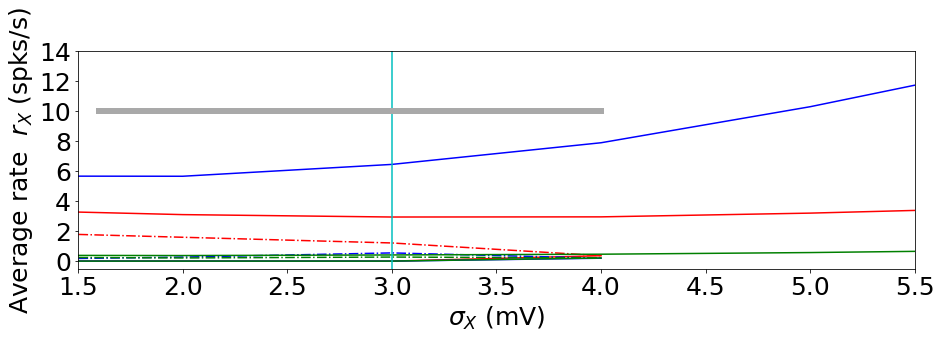

In [66]:
csvfile = './data/FP_Jai_sup_0_2000A.csv'
df = pd.read_csv(csvfile)

Lsig = df['sig']
re0 = df['x0']; ri0 = df['y0']; ra0 = df['z0']
rei = df['xi']; rii = df['yi']; rai = df['zi']
re1 = df['x1']; ri1 = df['y1']; ra1 = df['z1']

ini = 0; end0 = -4
plt.figure(figsize=(15,4))
plt.plot(np.array(Lsig[ini:end0]),re0[ini:end0]*1000,'r')
plt.plot(np.array(Lsig[ini:end0]),rei[ini:end0]*1000,'-.r')
plt.plot(np.array(Lsig[ini:end]),re1[ini:end]*1000,'r')

plt.plot(np.array(Lsig[ini:end0]),ri0[ini:end0]*1000,'b',label='stable')
plt.plot(np.array(Lsig[ini:end0]),rii[ini:end0]*1000,'-.b',label='unstable')
plt.plot(np.array(Lsig[ini:end]),ri1[ini:end]*1000,'b')

plt.plot(np.array(Lsig[ini:end0]),ra0[ini:end0]*1000,'g')
plt.plot(np.array(Lsig[ini:end0]),rai[ini:end0]*1000,'-.g')
plt.plot(np.array(Lsig[ini:end]),ra1[ini:end]*1000,'g')

plt.axvline([3],color='c')
plt.plot([1.6,4],[10,10],color='darkgray',linewidth=6)
plt.ylim(-0.5,14)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim([1.5,5.5])
plt.xlabel(r'$\sigma_X$ (mV)', fontsize=25)
plt.ylabel('Average rate  $r_X$ (spks/s)', fontsize=25)

plt.savefig('./figures2000A/FP_Jai_sup_0_2000A.pdf.pdf',bbox_inches='tight')